<a href="https://colab.research.google.com/github/AlexNoonan-Syracuse/Titanic/blob/main/Titantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/AlexNoonan-Syracuse/Titanic/main/titanic3.csv")

print(df.head())
print(df.columns)
print(df.info())

df['pclass'] = df['pclass'].fillna("Unknown")
df['home.dest'] = df['home.dest'].fillna("Unkonwn")
df['embarked'] = df['embarked'].fillna("Unk")

print(df.info())
print(df['embarked'].unique())

   pclass  survived  ...   body                        home.dest
0       1         1  ...    NaN                     St Louis, MO
1       1         1  ...    NaN  Montreal, PQ / Chesterville, ON
2       1         0  ...    NaN  Montreal, PQ / Chesterville, ON
3       1         0  ...  135.0  Montreal, PQ / Chesterville, ON
4       1         0  ...    NaN  Montreal, PQ / Chesterville, ON

[5 rows x 14 columns]
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   i

In [75]:
import numpy as np
pivot = pd.pivot_table(df, values=['name'], index=df['embarked'],aggfunc=lambda x: len(x.unique()))
pivot2 = pd.pivot_table(df, values=['survived'], index=df['embarked'], aggfunc=np.sum)
embarkedpivot = pd.merge(pivot, pivot2, how='inner', left_index=True, right_index=True)
embarkedpivot['SurvivalRate'] = embarkedpivot['survived']/embarkedpivot['name']
#print(finalpivot)

embarkNames = ['Cherbourg', 'Queenstown', 'SouthHampton', 'Unknown']
embarkedpivot.index = embarkNames
print(embarkedpivot)


gender = pd.pivot_table(df, values=['name'], index=df['sex'],aggfunc=lambda x: len(x.unique()))
survivedGender  = pd.pivot_table(df, values=['survived'], index=df['sex'], aggfunc=np.sum)
genderpivot = pd.merge(gender, survivedGender, how='inner', left_index=True, right_index=True)
genderpivot['SurvivalRate'] = genderpivot['survived']/genderpivot['name']
labels = ['female', 'male']
genderpivot.index = labels
print(genderpivot)
# class
classy = pd.pivot_table(df, values=['name'], index=df['pclass'],aggfunc=lambda x: len(x.unique()))
survivedClassy  = pd.pivot_table(df, values=['survived'], index=df['pclass'], aggfunc=np.sum)
classyPivot = pd.merge(classy, survivedClassy, how='inner', left_index=True, right_index=True)
classyPivot['SurvivalRate'] =classyPivot['survived']/classyPivot['name']

labels2 = ['First Class', 'Second Class', 'Third Class']
classyPivot.index = labels2
print(classyPivot)


masterpivot = pd.pivot_table(df, values=['name'], index=['embarked', 'pclass'],aggfunc=lambda x: len(x.unique()))
masterpivotsurvived  = pd.pivot_table(df, values=['survived'], index=['embarked', 'pclass'], aggfunc=np.sum)

masterpivotfinal = pd.merge(masterpivot, masterpivotsurvived, how='inner', left_index=True, right_index=True)
masterpivotfinal['SurvivalRate'] =masterpivotfinal['survived']/masterpivotfinal['name']
print(masterpivotfinal)

              name  survived  SurvivalRate
Cherbourg      270       150      0.555556
Queenstown     122        44      0.360656
SouthHampton   914       304      0.332604
Unknown          2         2      1.000000
        name  survived  SurvivalRate
female   465       339      0.729032
male     842       161      0.191211
              name  survived  SurvivalRate
First Class    323       200      0.619195
Second Class   277       119      0.429603
Third Class    707       181      0.256011
                 name  survived  SurvivalRate
embarked pclass                              
C        1        141        97      0.687943
         2         28        16      0.571429
         3        101        37      0.366337
Q        1          3         2      0.666667
         2          7         2      0.285714
         3        112        40      0.357143
S        1        177        99      0.559322
         2        242       101      0.417355
         3        495       104      0.210

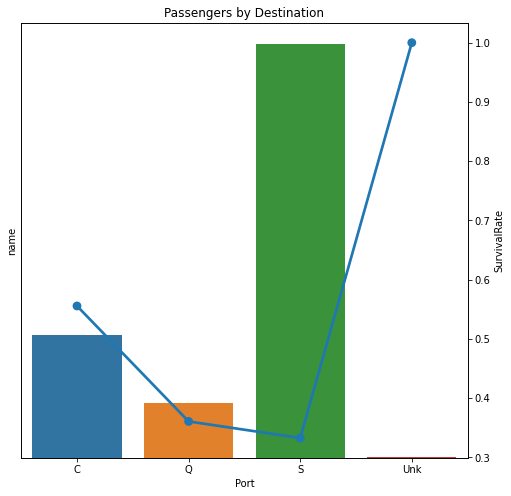

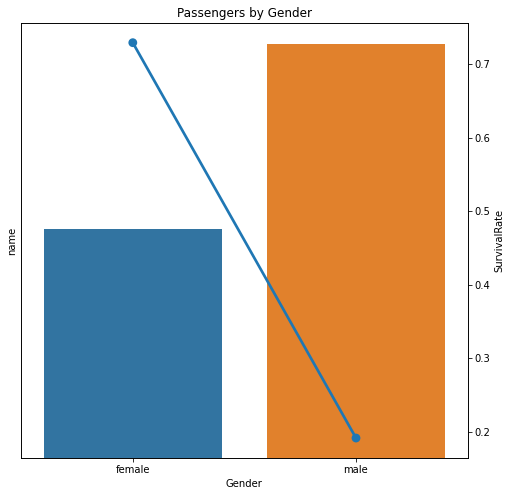

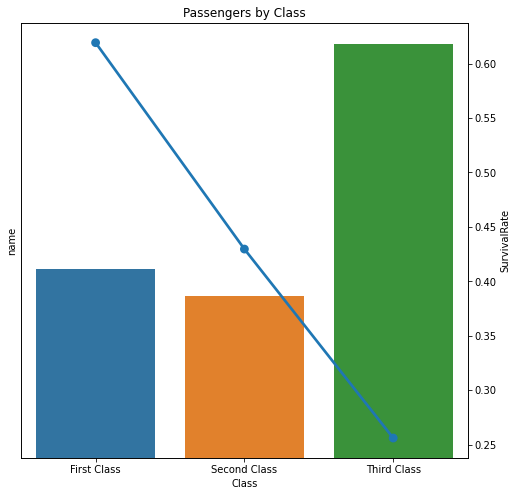

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 1, figsize = (8,8))
g1 = sns.barplot(x=pivot.index, y='name', data=embarkedpivot,  ec=None)
g1.set(xticklabels=[])
g1.set(title='Passengers by Destination')
g1.set(xlabel="Port")

g1.set(xticks=[])
g1.set(yticks=[])
g2=axs.twinx()
g2 = sns.pointplot(x=pivot.index ,y='SurvivalRate',data=embarkedpivot, label='Survivial Rate')

plt.show()
# breakdown of gender and class

# who died of embark port, gender class
fig, axs = plt.subplots(1, 1, figsize = (8,8))

g1 = sns.barplot(x=genderpivot.index, y='name', data=genderpivot,  ec=None)
g1.set(xticklabels=[])
g1.set(title='Passengers by Gender')
g1.set(xlabel="Gender")
g1.set(xticks=[])
g1.set(yticks=[])
g2=axs.twinx()
g2 = sns.pointplot(x=genderpivot.index ,y='SurvivalRate',data=genderpivot, label='Survivial Rate')

plt.show()


fig, axs = plt.subplots(1, 1, figsize = (8,8))

g1 = sns.barplot(x=classyPivot.index, y='name', data=classyPivot,  ec=None)

g1.set(xticklabels=[])
g1.set(title='Passengers by Class')
g1.set(xlabel="Class")
g1.set(xticks=[])
g1.set(yticks=[])
g2=axs.twinx()
g2 = sns.pointplot(x=classyPivot.index ,y='SurvivalRate',data=classyPivot, label='Survivial Rate')

plt.show()